# Loading Data and necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("./2.csv", delimiter=";")
df.head()

,ENROLLMENT,TUITION PAYMENT MARCH 2022,TUITION PAYMENT MARCH 2023,GENDER,TYPE OF EDUCATIONAL INSTITUTION,EDUCATIONAL INSTITUTION,INSTITUTION STATUS,DEPARTMENT,PROVINCE,DISTRICT,...,CAMPUS,FACULTY,PROGRAM/MAJOR,SHIFT/SCHEDULE,BENEFIT DISCOUNTS,STUDY MODE,AGE RANGE OF ENROLLED STUDENT,DISABILITY,NUMBER OF ENROLLED COURSES,AT-RISK COURSE
0,Nuevo,0,0,M,INSTITUTO,IDAT,PRIVADA,LIMA,LIMA,BRENA,...,UTP Lima Centro,Fac. Ing. Sist. Y Elect.,ING. DE REDES Y COMUNICACIONES,MIXTO,SIN BENEFICIO,Presencial,5. >=30,No,0,0
1,Nuevo,1,0,M,COLEGIO,COLEGIO SISE,PRIVADA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,...,UTP Lima Centro,Fac. Ing. Sist. Y Elect.,ING. DE SISTEMAS,NOCHE,SIN BENEFICIO,Presencial,4. 24-29,No,3,0
2,Nuevo,1,1,F,NaN,NaN,NaN,LIMA,LIMA,JESUS MARIA,...,UTP Lima Centro,Fac. Der. Cienc. Polit. Y RRII,DERECHO,NOCHE,SIN BENEFICIO,Presencial,4. 24-29,No,1,0
3,Nuevo,0,0,F,COLEGIO,1220 SAN JOSE MARELLO,ESTATAL,LIMA,LIMA,ATE,...,UTP Lima Centro,Fac. Adm. Y Neg.,ADMINISTRACION DE NEGOCIOS (50/50),NOCHE,SIN BENEFICIO,Presencial,4. 24-29,No,0,0
4,Nuevo,1,1,F,INSTITUTO,IDAT,PRIVADA,LIMA,LIMA,SURQUILLO,...,UTP Lima Centro,Fac. Adm. Y Neg.,ADM. DE NEGOCIOS INTERNACIO,MAÑANA,CONVENIOS,Presencial,4. 24-29,No,2,0


In [5]:
df.describe()

,TUITION PAYMENT MARCH 2022,TUITION PAYMENT MARCH 2023,NUMBER OF ENROLLED COURSES,AT-RISK COURSE
count,37582.000000,37582.000000,37582.000000,37582.000000
mean,0.861476,0.841334,1.940078,0.148422
std,0.345453,0.365370,0.986984,0.512012
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,2.000000,0.000000
75%,1.000000,1.000000,3.000000,0.000000
max,1.000000,1.000000,6.000000,5.000000


## Checking null values

In [6]:
def checknulls():
    for col in df.columns:
        if(df[col].hasnans):
            print(col, df[col].isnull().sum())
checknulls()

GENDER 2
TYPE OF EDUCATIONAL INSTITUTION 21714
EDUCATIONAL INSTITUTION 19370
INSTITUTION STATUS 21714
DEPARTMENT 736
PROVINCE 736
DISTRICT 736
CLASSIFICATION 1
FACULTY 1
PROGRAM/MAJOR 1
SHIFT/SCHEDULE 58
AGE RANGE OF ENROLLED STUDENT 4


In [7]:
# Treating unknown values (U) as nan
df['GENDER'] = df['GENDER'].replace('U', np.nan)
df['GENDER'].unique()

array(['M', 'F', nan, '2', '1'], dtype=object)

In [8]:
checknulls()

GENDER 203
TYPE OF EDUCATIONAL INSTITUTION 21714
EDUCATIONAL INSTITUTION 19370
INSTITUTION STATUS 21714
DEPARTMENT 736
PROVINCE 736
DISTRICT 736
CLASSIFICATION 1
FACULTY 1
PROGRAM/MAJOR 1
SHIFT/SCHEDULE 58
AGE RANGE OF ENROLLED STUDENT 4


## Handling missing values

In [9]:
# drop rows with null values
df.dropna(subset = ['CLASSIFICATION', 'FACULTY', 'PROGRAM/MAJOR','GENDER', 'AGE RANGE OF ENROLLED STUDENT', 'DEPARTMENT', 'PROVINCE', 'DISTRICT', 'SHIFT/SCHEDULE'], inplace = True)
df['CLASSIFICATION'].hasnans

False

In [10]:
checknulls()

TYPE OF EDUCATIONAL INSTITUTION 20949
EDUCATIONAL INSTITUTION 18637
INSTITUTION STATUS 20949


In [11]:
df.columns

Index(['ENROLLMENT', 'TUITION PAYMENT MARCH 2022',
       'TUITION PAYMENT MARCH 2023', 'GENDER',
       'TYPE OF EDUCATIONAL INSTITUTION', 'EDUCATIONAL INSTITUTION',
       'INSTITUTION STATUS', 'DEPARTMENT', 'PROVINCE', 'DISTRICT',
       'CLASSIFICATION', 'CAMPUS', 'FACULTY', 'PROGRAM/MAJOR',
       'SHIFT/SCHEDULE', 'BENEFIT DISCOUNTS', 'STUDY MODE',
       'AGE RANGE OF ENROLLED STUDENT', 'DISABILITY',
       'NUMBER OF ENROLLED COURSES', 'AT-RISK COURSE'],
      dtype='object')

In [12]:
# Exclude the columns 'TYPE OF EDUCATIONAL INSTITUTION', 'EDUCATIONAL INSTITUTION', 'INSTITUTION STATUS' because they have large number of missing values because they are irrevelant
cat_cols = set(df.columns) - {'TYPE OF EDUCATIONAL INSTITUTION', 'EDUCATIONAL INSTITUTION', 'INSTITUTION STATUS'}
for col in df.columns:
    if(not(df[col].dtype==object)):
        cat_cols = cat_cols - {col}
        print(col,len(df[col].unique()),df[col].dtype)
cat_cols = cat_cols - {"GENDER"}
cat_cols = list(cat_cols)
cat_cols

TUITION PAYMENT MARCH 2022 2 int64
TUITION PAYMENT MARCH 2023 2 int64
NUMBER OF ENROLLED COURSES 7 int64
AT-RISK COURSE 6 int64


['CLASSIFICATION',
 'PROGRAM/MAJOR',
 'FACULTY',
 'DISABILITY',
 'DEPARTMENT',
 'CAMPUS',
 'BENEFIT DISCOUNTS',
 'AGE RANGE OF ENROLLED STUDENT',
 'PROVINCE',
 'SHIFT/SCHEDULE',
 'STUDY MODE',
 'DISTRICT',
 'ENROLLMENT']

## Encoding categorical variables

In [13]:
# Encoding
for col in cat_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    keys = encoder.inverse_transform(df[col])
    d = dict(zip(keys, df[col]))
    d = {k: int(v) for k, v in d.items()}
    # print(encoder.inverse_transform(df[col]))
    print(f"For column {col}:")
    for k in d:
        print(f"{k}: {d[k]}")
    print("\n")
df['GENDER'] = df['GENDER'].replace({'M':1, 'F':2, '2':2, '1':1})
df

For column CLASSIFICATION:
Carreras Pregrado: 1
Carreras Pregrado 50-50: 2
Carreras Pregrado 80-20: 3
Carreras PPE: 0
Carreras Pregrado Virtual: 4


For column PROGRAM/MAJOR:
ING. DE REDES Y COMUNICACIONES: 36
ING. DE SISTEMAS: 40
DERECHO: 24
ADMINISTRACION DE NEGOCIOS (50/50): 12
ADM. DE NEGOCIOS INTERNACIO: 4
DISEÑO DIGITAL PUBLICITARIO: 28
ING. ELECTRONICA: 50
ING. DE DISEÑO GRAFICO: 35
INGENIERIA INDUSTRIAL (50/50): 63
ING. DE SISTEMAS E INFORMÁTICA (80/20): 43
ING. DE TELECOMUNICACIONES: 46
ADM. DE NEGOCIOS Y FINANZAS (50/50): 6
ADM. DE EMPRESAS (80/20): 2
PSICOLOGIA (80/20): 79
INGENIERIA INDUSTRIAL: 62
ADM. DE EMPRESAS: 1
PSICOLOGIA: 78
ING. BIOMEDICA: 32
CONTABILIDAD: 19
NEGOCIOS INTERNACIONALES (50/50): 75
TERAPIA FÍSICA: 82
ING. DE SOFTWARE: 45
CONTABILIDAD FINANCIERA (50/50): 23
ING. AUTOMOTRIZ: 31
INGENIERÍA EMPRESARIAL: 71
ENFERMERÍA: 29
ING. INDUSTRIAL: 52
INGENIERÍA CIVIL (50/50): 68
CIENCIAS DE LA COMUNICACIÓN: 17
ING. ELECTRICA Y DE POTENCIA: 48
ARQUITECTURA: 16
OBSTET

C:\Users\visha\AppData\Local\Temp\ipykernel_18132\3814910813.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['GENDER'] = df['GENDER'].replace({'M':1, 'F':2, '2':2, '1':1})


,ENROLLMENT,TUITION PAYMENT MARCH 2022,TUITION PAYMENT MARCH 2023,GENDER,TYPE OF EDUCATIONAL INSTITUTION,EDUCATIONAL INSTITUTION,INSTITUTION STATUS,DEPARTMENT,PROVINCE,DISTRICT,...,CAMPUS,FACULTY,PROGRAM/MAJOR,SHIFT/SCHEDULE,BENEFIT DISCOUNTS,STUDY MODE,AGE RANGE OF ENROLLED STUDENT,DISABILITY,NUMBER OF ENROLLED COURSES,AT-RISK COURSE
0,0,0,0,1,INSTITUTO,IDAT,PRIVADA,14,98,54,...,6,6,36,1,4,0,4,0,0,0
1,0,1,0,1,COLEGIO,COLEGIO SISE,PRIVADA,14,98,660,...,6,6,40,2,4,0,3,0,3,0
2,0,1,1,2,NaN,NaN,NaN,14,98,268,...,6,3,24,2,4,0,3,0,1,0
3,0,0,0,2,COLEGIO,1220 SAN JOSE MARELLO,ESTATAL,14,98,32,...,6,0,12,2,4,0,3,0,0,0
4,0,1,1,2,INSTITUTO,IDAT,PRIVADA,14,98,606,...,6,0,4,0,2,0,3,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37577,2,1,1,2,NaN,UNIVERSIDAD,NaN,3,8,95,...,13,4,80,1,4,2,4,0,2,0
37578,2,1,1,2,NaN,NaN,NaN,14,98,324,...,13,4,80,1,4,2,4,0,3,0
37579,2,1,1,2,NaN,NaN,NaN,14,98,308,...,13,0,3,2,4,2,4,0,3,0
37580,2,1,1,1,UNIVERSIDAD,PONTIFICIAUNIVERSIDADCATÓLIC,PRIVADA,14,98,137,...,13,5,54,1,4,2,4,0,3,0


## Splitting data in test and train

In [14]:
# Train Test Split
X = df.drop(['TUITION PAYMENT MARCH 2023','TYPE OF EDUCATIONAL INSTITUTION', 'EDUCATIONAL INSTITUTION', 'INSTITUTION STATUS'], axis=1)
y = df['TUITION PAYMENT MARCH 2023']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#Perform exploratory data analysis (EDA) to identify trends and anomalies

In [16]:
df.describe()

,ENROLLMENT,TUITION PAYMENT MARCH 2022,TUITION PAYMENT MARCH 2023,GENDER,DEPARTMENT,PROVINCE,DISTRICT,CLASSIFICATION,CAMPUS,FACULTY,PROGRAM/MAJOR,SHIFT/SCHEDULE,BENEFIT DISCOUNTS,STUDY MODE,AGE RANGE OF ENROLLED STUDENT,DISABILITY,NUMBER OF ENROLLED COURSES,AT-RISK COURSE
count,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000
mean,1.885633,0.863028,0.842882,1.436721,11.301416,77.264351,333.768205,1.803165,6.519681,3.756287,39.344413,1.181883,3.977148,0.806664,2.194867,0.001995,1.947217,0.148890
std,0.411062,0.343823,0.363917,0.495986,4.977920,39.128958,207.070904,1.230257,4.136690,2.033755,23.491469,0.757864,0.260414,0.934002,1.355671,0.044626,0.985213,0.512906
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,7.000000,43.000000,124.000000,1.000000,3.000000,3.000000,21.000000,1.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,2.000000,1.000000,1.000000,1.000000,14.000000,98.000000,320.000000,1.000000,6.000000,5.000000,40.000000,1.000000,4.000000,0.000000,2.000000,0.000000,2.000000,0.000000
75%,2.000000,1.000000,1.000000,2.000000,14.000000,98.000000,532.000000,3.000000,9.000000,5.000000,57.000000,2.000000,4.000000,2.000000,3.000000,0.000000,3.000000,0.000000
max,2.000000,1.000000,1.000000,2.000000,24.000000,164.000000,693.000000,4.000000,13.000000,7.000000,82.000000,3.000000,6.000000,2.000000,4.000000,1.000000,6.000000,5.000000


# Performing EDA for numerical attribute

## Plotting heatmap

In [17]:
num_cols = ['TUITION PAYMENT MARCH 2022', 'TUITION PAYMENT MARCH 2023', 'NUMBER OF ENROLLED COURSES', 'AT-RISK COURSE']
cols = cat_cols

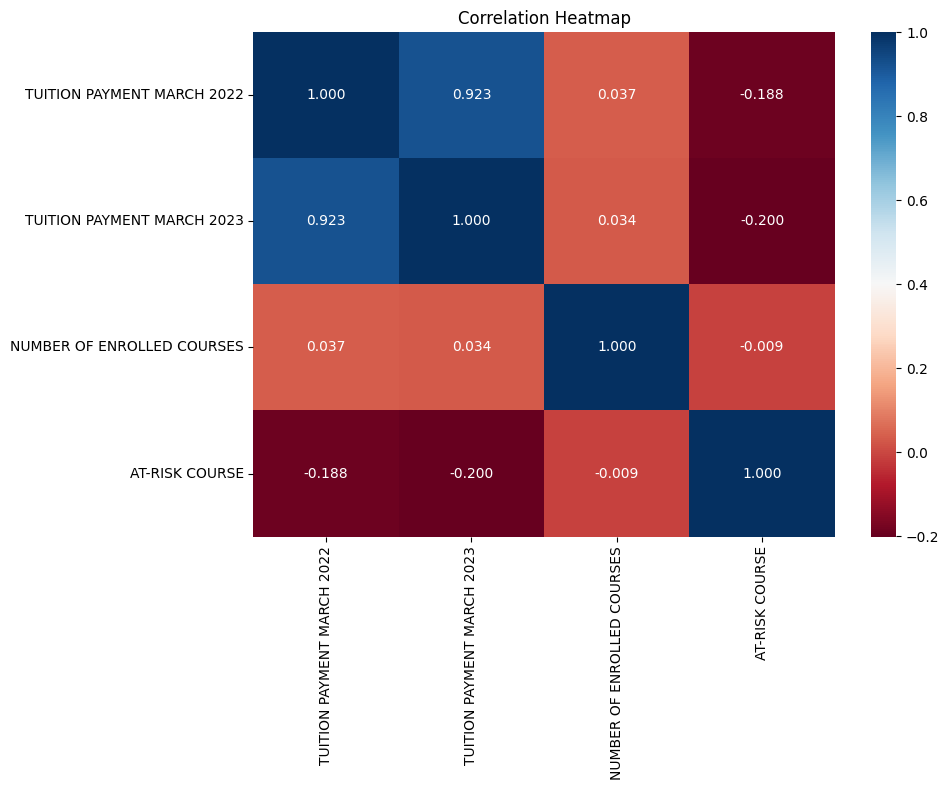

In [18]:
numeric_df = df[num_cols]

# Correlation heatmap
plt.figure(figsize=(10,8))
corr = numeric_df.corr()
sns.heatmap(corr, annot = True, cmap = 'RdBu', fmt = '.3f' )
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

## Plotting Histogram,Count plot,Box plot,Violin plot

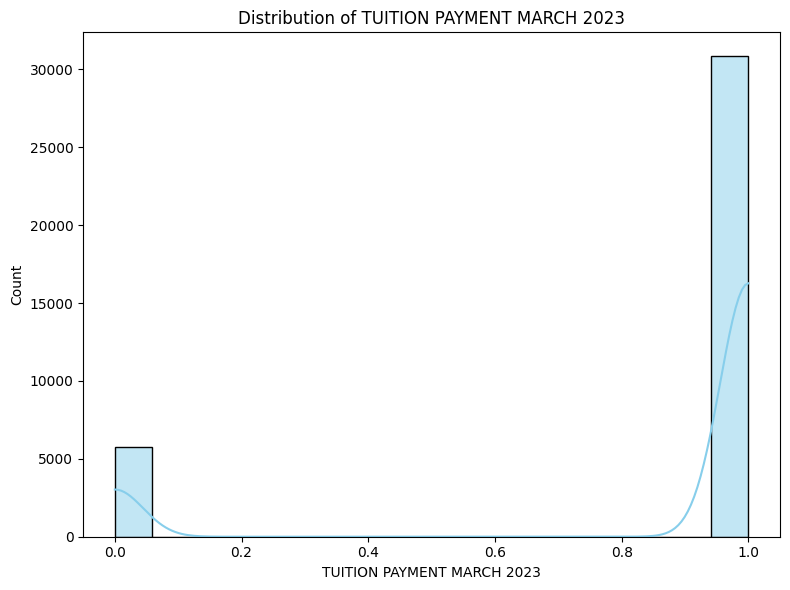

C:\Users\visha\AppData\Local\Temp\ipykernel_18132\2803565031.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='GENDER', data=df, palette='pastel')


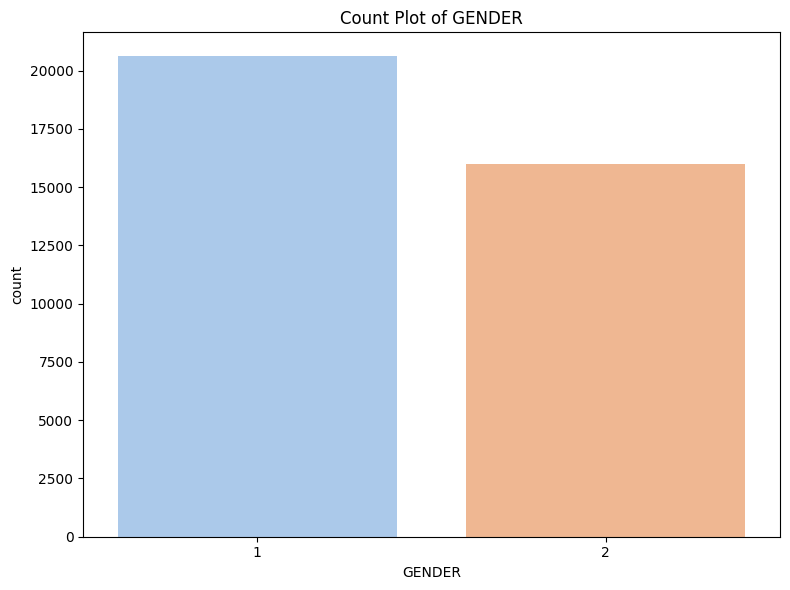

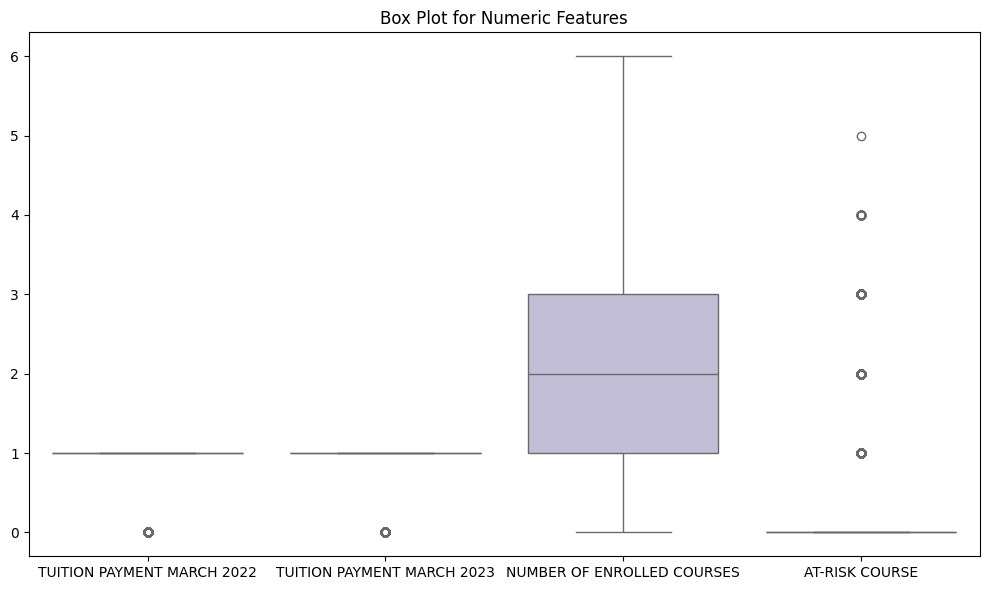

C:\Users\visha\AppData\Local\Temp\ipykernel_18132\2803565031.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='GENDER', y='TUITION PAYMENT MARCH 2023', data=df, palette='muted')


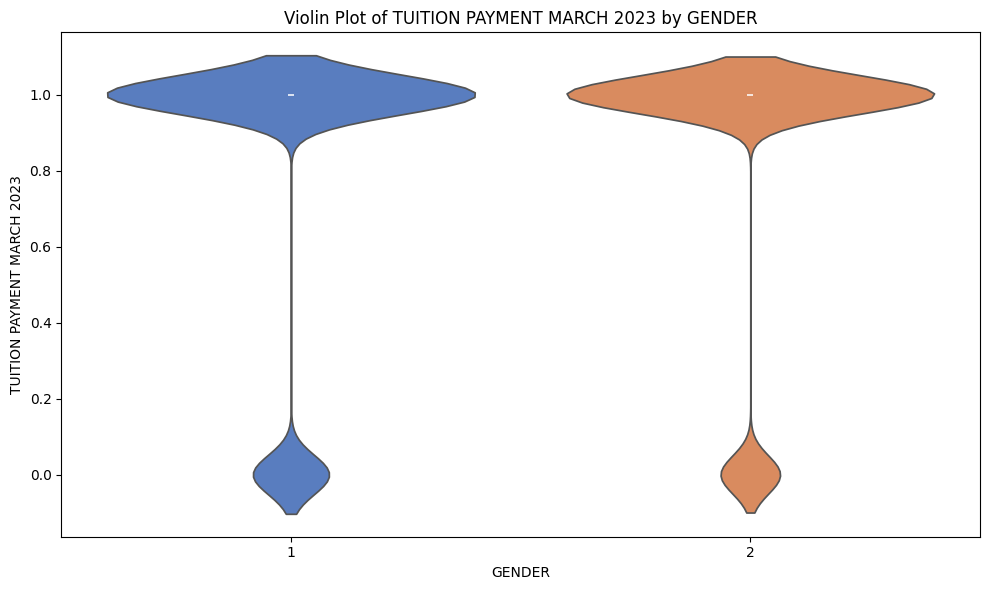

In [19]:
# Histogram of TUITION PAYMENT MARCH 2023
plt.figure(figsize=(8, 6))
sns.histplot(df['TUITION PAYMENT MARCH 2023'], kde=True, color='skyblue')
plt.title('Distribution of TUITION PAYMENT MARCH 2023')
plt.tight_layout()
plt.show()

# Count plot (pie chart style) for GENDER
plt.figure(figsize=(8, 6))
sns.countplot(x='GENDER', data=df, palette='pastel')
plt.title('Count Plot of GENDER')
plt.tight_layout()
plt.show()

# Box plot for tuition payments
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_df, palette='Set3')
plt.title('Box Plot for Numeric Features')
plt.tight_layout()
plt.show()

# Violin plot for tuition payments by GENDER (if applicable)
if 'GENDER' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='GENDER', y='TUITION PAYMENT MARCH 2023', data=df, palette='muted')
    plt.title('Violin Plot of TUITION PAYMENT MARCH 2023 by GENDER')
    plt.tight_layout()
    plt.show()

## plotting pairplot for all columns

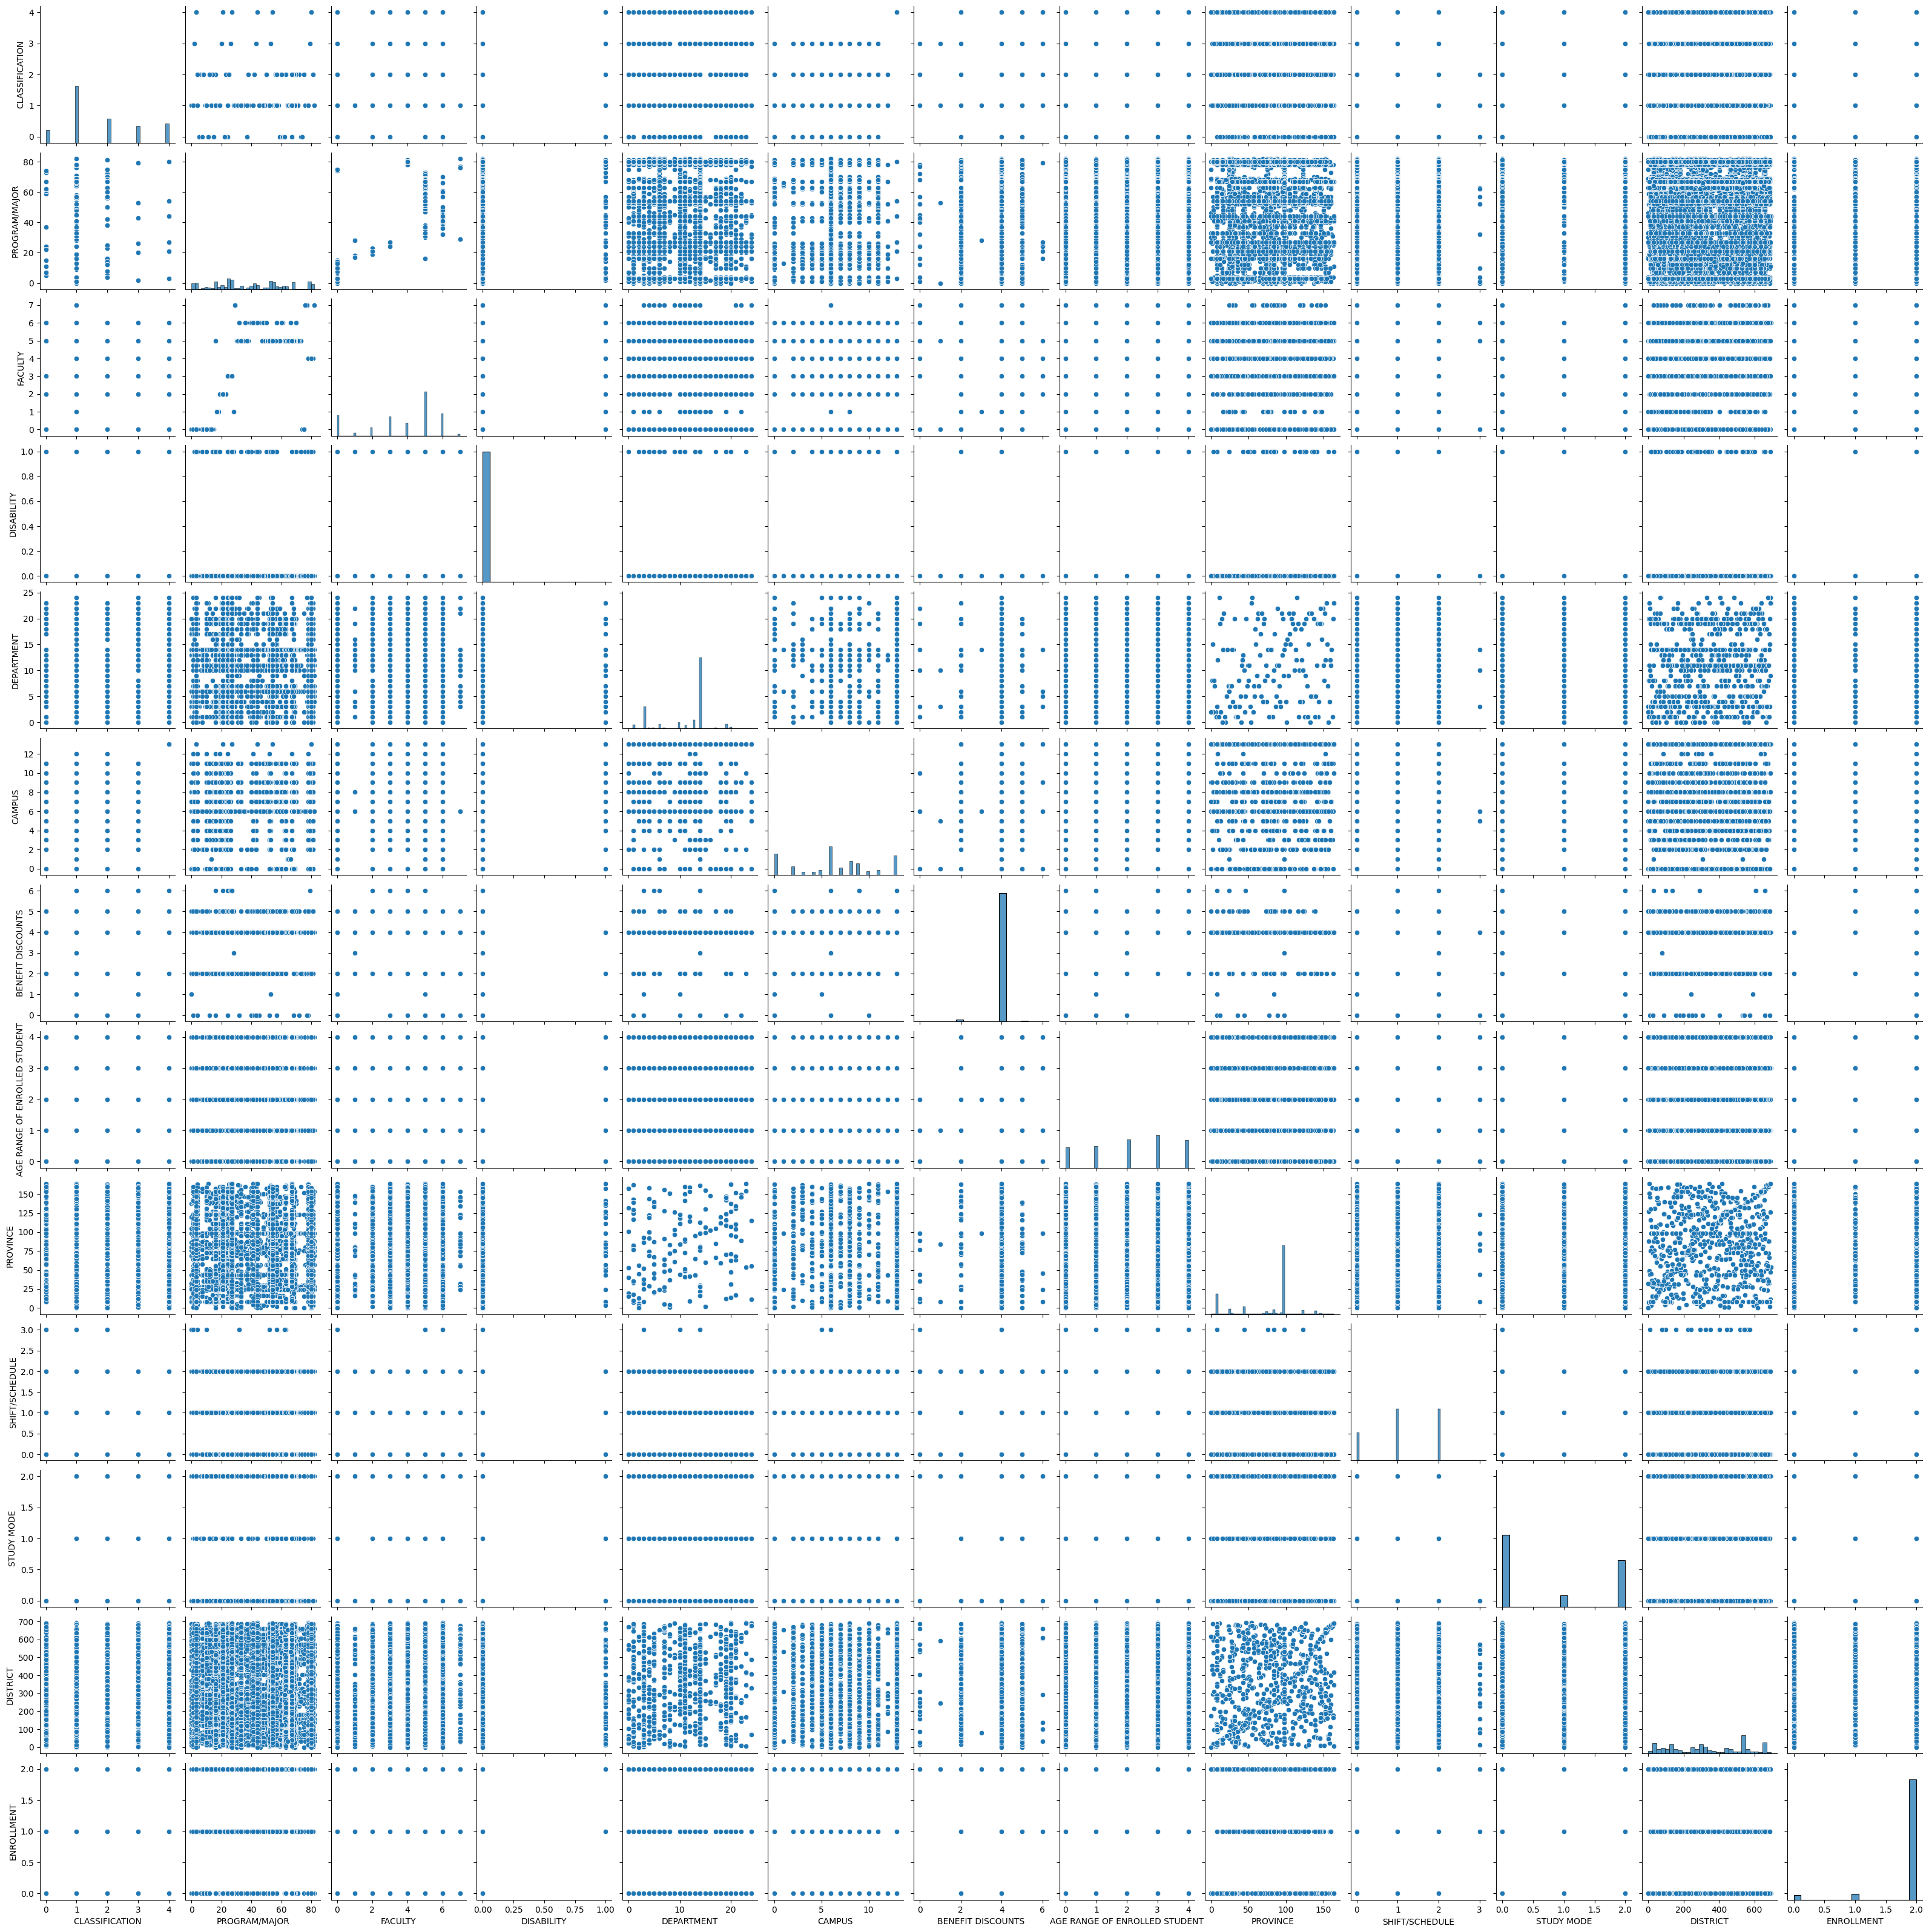

In [20]:
#plotting pairplot for all columns
sns.pairplot(df[cols])

## plotting histogram for all columns

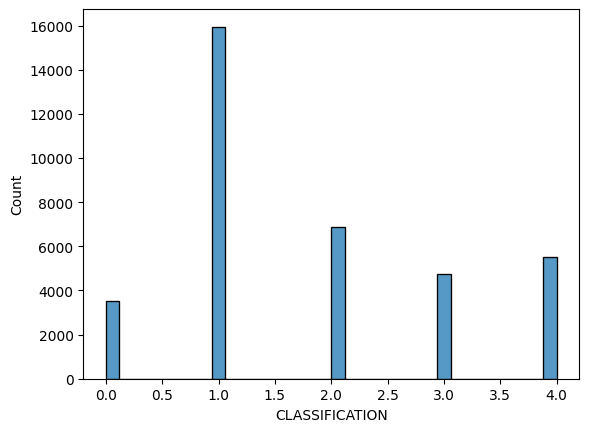

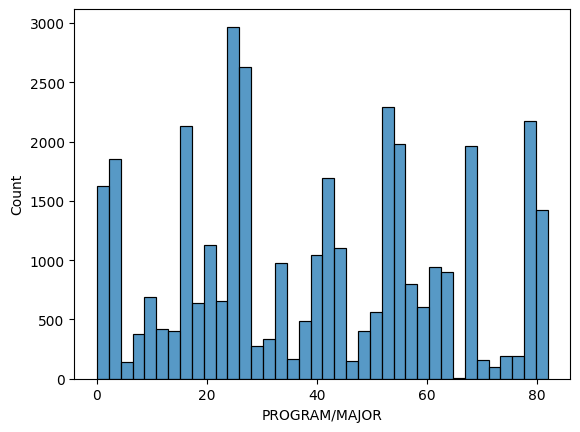

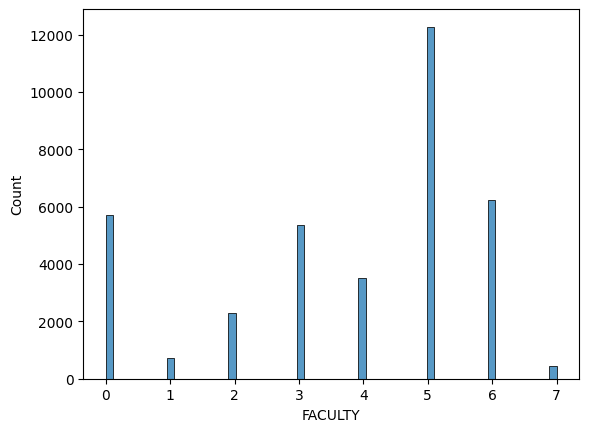

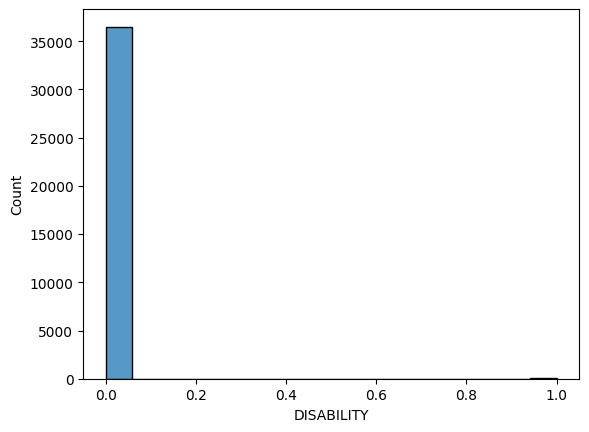

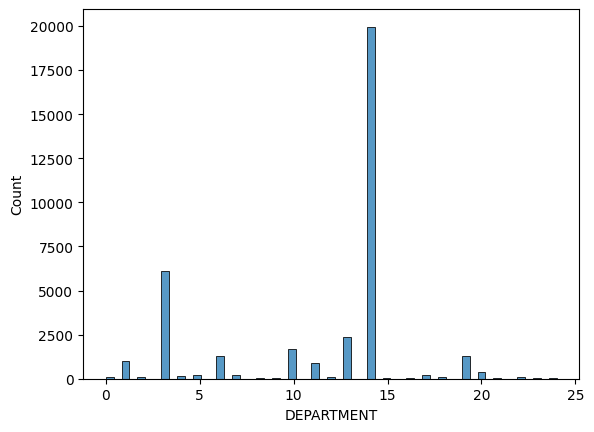

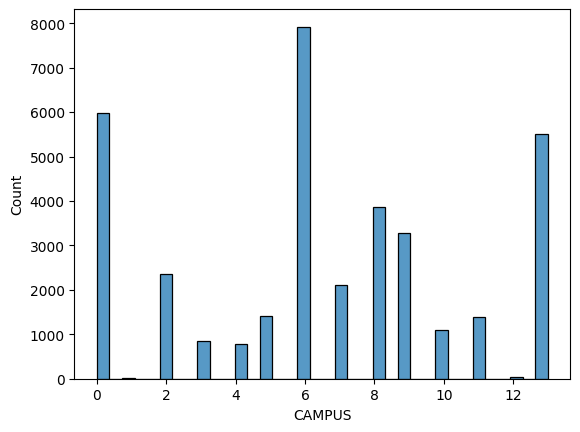

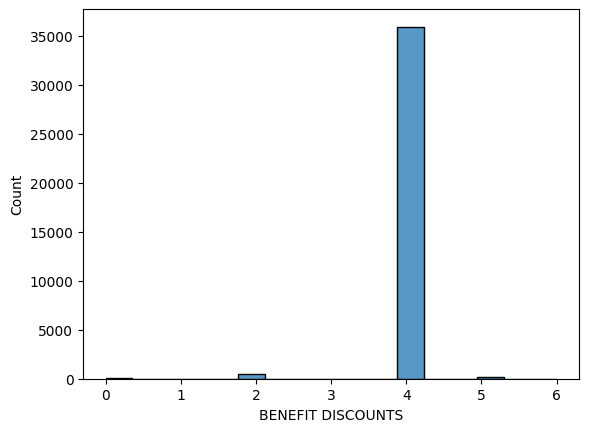

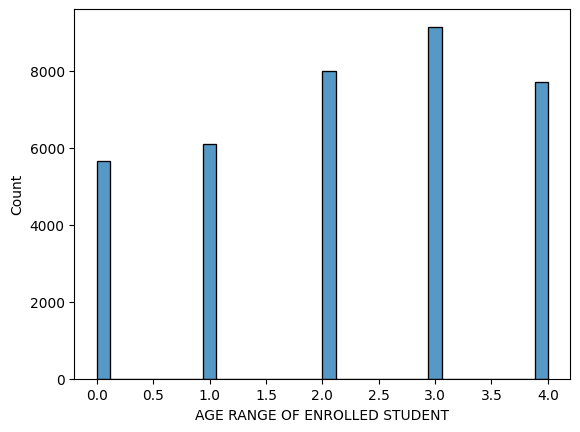

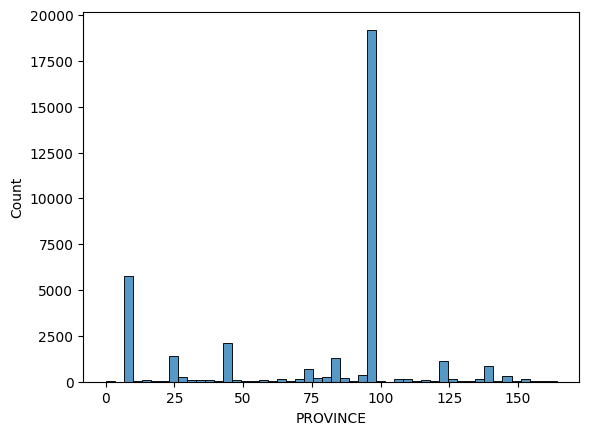

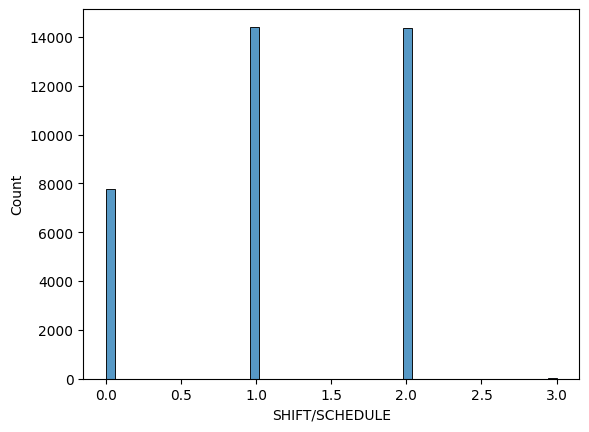

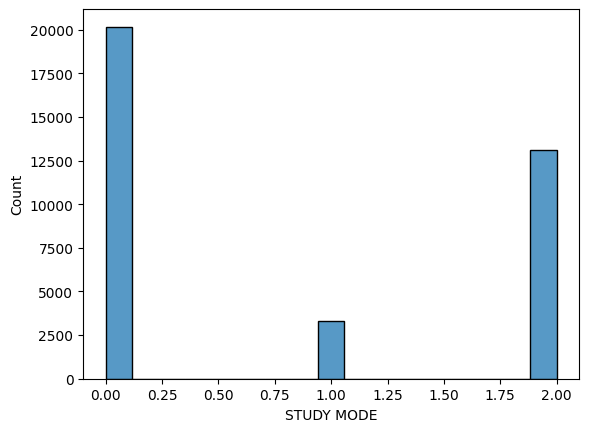

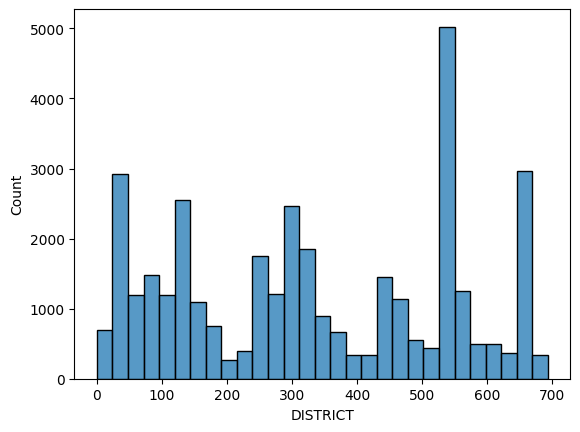

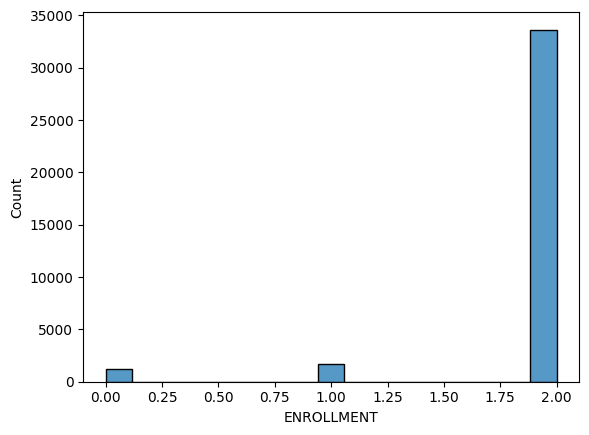

In [21]:
#plotting histogram for all columns
for col in cols:
    plt.figure()
    sns.histplot(df[col])
    plt.show()

In [22]:
df[cat_cols].corr()

,CLASSIFICATION,PROGRAM/MAJOR,FACULTY,DISABILITY,DEPARTMENT,CAMPUS,BENEFIT DISCOUNTS,AGE RANGE OF ENROLLED STUDENT,PROVINCE,SHIFT/SCHEDULE,STUDY MODE,DISTRICT,ENROLLMENT
CLASSIFICATION,1.000000,0.040039,-0.013033,0.016116,0.003091,0.490618,0.008058,0.170260,0.012495,-0.026130,0.601834,-0.011553,0.010564
PROGRAM/MAJOR,0.040039,1.000000,0.659824,0.005081,-0.035882,-0.037095,0.037109,-0.004949,-0.026390,-0.001332,0.008158,-0.010467,0.006415
FACULTY,-0.013033,0.659824,1.000000,-0.004882,0.004270,-0.017365,0.048220,-0.073095,0.008260,0.034276,-0.043917,-0.004572,0.019269
DISABILITY,0.016116,0.005081,-0.004882,1.000000,-0.006276,0.008746,-0.005485,-0.001457,0.000762,0.000584,0.004009,-0.006931,0.009461
DEPARTMENT,0.003091,-0.035882,0.004270,-0.006276,1.000000,0.489824,-0.032368,0.033422,0.697685,-0.019677,0.014774,0.224867,0.011276
CAMPUS,0.490618,-0.037095,-0.017365,0.008746,0.489824,1.000000,-0.031250,0.278734,0.475518,-0.013837,0.292212,0.206781,-0.012228
BENEFIT DISCOUNTS,0.008058,0.037109,0.048220,-0.005485,-0.032368,-0.031250,1.000000,-0.034540,-0.026858,0.014135,0.005549,-0.006849,-0.003220
AGE RANGE OF ENROLLED STUDENT,0.170260,-0.004949,-0.073095,-0.001457,0.033422,0.278734,-0.034540,1.000000,-0.029642,-0.000682,0.115137,0.012332,-0.027454
PROVINCE,0.012495,-0.026390,0.008260,0.000762,0.697685,0.475518,-0.026858,-0.029642,1.000000,0.014026,0.033972,0.251899,-0.005997
SHIFT/SCHEDULE,-0.026130,-0.001332,0.034276,0.000584,-0.019677,-0.013837,0.014135,-0.000682,0.014026,1.000000,0.016739,0.013128,-0.056508


## plotting heatmap for all columns

<Axes: >

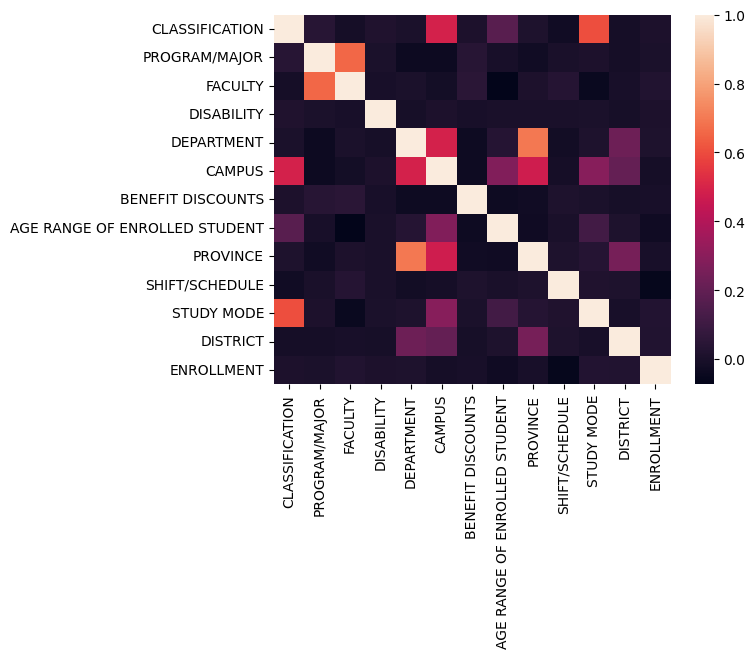

In [23]:
#plotting heatmap for all columns
sns.heatmap(df[cols].corr())

In [24]:
df.describe()

,ENROLLMENT,TUITION PAYMENT MARCH 2022,TUITION PAYMENT MARCH 2023,GENDER,DEPARTMENT,PROVINCE,DISTRICT,CLASSIFICATION,CAMPUS,FACULTY,PROGRAM/MAJOR,SHIFT/SCHEDULE,BENEFIT DISCOUNTS,STUDY MODE,AGE RANGE OF ENROLLED STUDENT,DISABILITY,NUMBER OF ENROLLED COURSES,AT-RISK COURSE
count,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000
mean,1.885633,0.863028,0.842882,1.436721,11.301416,77.264351,333.768205,1.803165,6.519681,3.756287,39.344413,1.181883,3.977148,0.806664,2.194867,0.001995,1.947217,0.148890
std,0.411062,0.343823,0.363917,0.495986,4.977920,39.128958,207.070904,1.230257,4.136690,2.033755,23.491469,0.757864,0.260414,0.934002,1.355671,0.044626,0.985213,0.512906
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,7.000000,43.000000,124.000000,1.000000,3.000000,3.000000,21.000000,1.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,2.000000,1.000000,1.000000,1.000000,14.000000,98.000000,320.000000,1.000000,6.000000,5.000000,40.000000,1.000000,4.000000,0.000000,2.000000,0.000000,2.000000,0.000000
75%,2.000000,1.000000,1.000000,2.000000,14.000000,98.000000,532.000000,3.000000,9.000000,5.000000,57.000000,2.000000,4.000000,2.000000,3.000000,0.000000,3.000000,0.000000
max,2.000000,1.000000,1.000000,2.000000,24.000000,164.000000,693.000000,4.000000,13.000000,7.000000,82.000000,3.000000,6.000000,2.000000,4.000000,1.000000,6.000000,5.000000
